# Titanic Survival Prediction

I worked on the **Titanic Survival Prediction** project.  
In this project, I built a machine learning model that predicts whether a passenger survived the Titanic disaster based on features such as their age, gender, class, and fare.

I used **Python** and libraries like **Pandas**, **NumPy**, **Matplotlib**, **Seaborn**, and **Scikit-learn** for data preprocessing, analysis, and model building.


In [1]:
# 📥 Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## Loading the Dataset

I used the Titanic dataset to train and test my model.  
The dataset contained details about passengers like their age, gender, ticket class, and survival status.


In [2]:
# Loading dataset from seaborn
df = sns.load_dataset('titanic')

# Displaying first few records
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Exploratory Data Analysis (EDA)

I explored the dataset to understand its structure, data types, and missing values.  
This helped me identify which columns needed cleaning and what kind of preprocessing was required.


In [3]:
# Checking basic info
df.info()

# Summary statistics
df.describe()

# Missing values count
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### Visualizing Insights

I visualized key relationships in the data to understand how survival varied with different factors such as gender and passenger class.


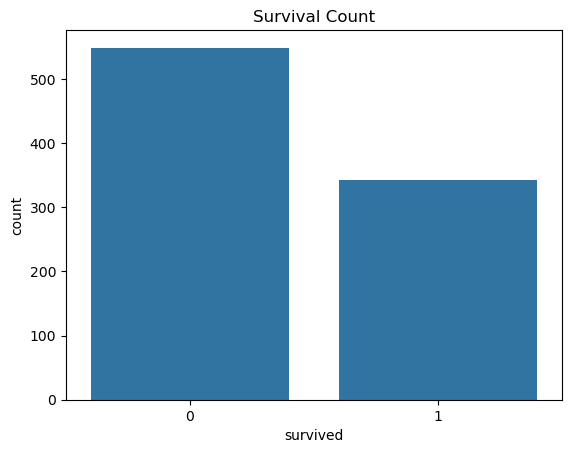

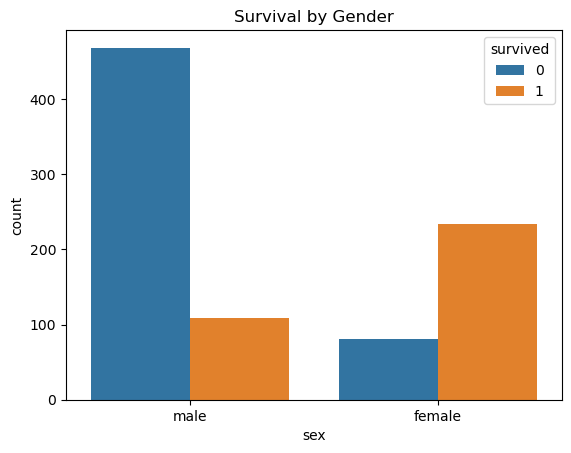

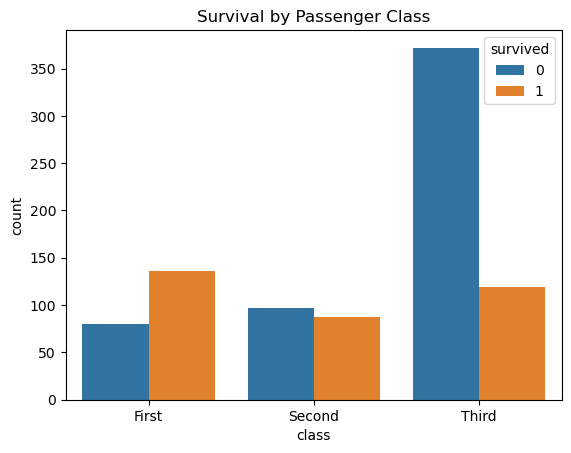

In [6]:
sns.countplot(x='survived', data=df)
plt.title('Survival Count')
plt.show()

sns.countplot(x='sex', hue='survived', data=df)
plt.title('Survival by Gender')
plt.show()

sns.countplot(x='class', hue='survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()


##  Data Cleaning and Preprocessing

I cleaned the data by handling missing values, dropping irrelevant columns, and encoding categorical variables into numerical form to prepare the dataset for model training.


In [7]:
# Dropping irrelevant columns
df = df.drop(['deck', 'embark_town', 'alive', 'adult_male', 'who', 'alone'], axis=1)

# Filling missing values
df['age'] = df['age'].fillna(df['age'].median())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# Encoding categorical columns
label = LabelEncoder()
for col in ['sex', 'embarked', 'class']:
    df[col] = label.fit_transform(df[col])

# Checking cleaned data
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class
0,0,3,1,22.0,1,0,7.2500,2,2
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,2,2
3,1,1,0,35.0,1,0,53.1000,2,0
4,0,3,1,35.0,0,0,8.0500,2,2


## Splitting the Dataset

I split the dataset into **training** and **testing** sets in an 80-20 ratio to evaluate my model’s performance fairly.


In [8]:
X = df.drop('survived', axis=1)
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## Model Building

I used a **Random Forest Classifier** because it performs well with structured data and handles both numerical and categorical features effectively.


In [10]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


## Model Evaluation

After training the model, I evaluated its performance using accuracy, confusion matrix, and classification report.  
These metrics helped me understand how well my model predicted survival.


In [12]:
accuracy = accuracy_score(y_test, y_pred)
print(f" Model Accuracy: {accuracy:.2f}")

print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))


 Model Accuracy: 0.82

 Confusion Matrix:
 [[90 15]
 [17 57]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



## Conclusion

The **Random Forest Classifier** performed well on the Titanic dataset and achieved a good accuracy score.  
Through this project, I learned how to clean data, perform exploratory analysis, and train predictive models using Python.  

In the future, I would like to:
- Experiment with **Logistic Regression** and **XGBoost**
- Perform **hyperparameter tuning**
- Add **feature engineering** (like family size, title extraction, etc.) for better accuracy.
